#Generate datasets

In [2]:
from Tools import generate_traj,random_rot,traj_to_dist
from scitool.propertie import Propertie

def add_miss_tracking(traj,N,f=10):
    
    step = traj[1:]-traj[:-1]
    
    std = np.average(np.sum(step**2,axis=1)**0.5)
    
    for i in range(N):
        w = np.random.randint(0,len(traj))
        traj[w] = np.random.normal(traj[w],f*std)
    
    return traj


def generate_N_nstep(N,nstep,ndim=2,sub=False):
    add = 0
    if ndim == 3:
        add = 1
    size = nstep
    
    X_train = np.zeros((N,size,(5+add)))
    Y_trains = np.zeros((N,size,10))
    Y_train_cat = np.zeros((N,1,27))
    Y_train_traj = []

    #12
    for i in range(N):
    #for i in range(1000):

        #if i % 1000 == 0:
        #    print i
        sigma = max(np.random.normal(0.5,1),0.05)
        step = max(np.random.normal(1,1),0.2)
        tryagain = True
        while tryagain:
            try:

         
                clean = 4
                if size >=50:
                    clean = 8
                    
                clean = False
                """
                ModelN,Model_num,s,sc,real_traj,norm,Z = generate_traj(size,sub=True,
                                                                       clean=clean,diff_sigma=2.0,
                                                                       delta_sigma_directed=1.,ndim=ndim,
                                                                      anisentropy=0.1,deltav=0.2,rho_fixed=False)
                """
                clean=10
                
                ModelN,Model_num,s,sc,real_traj,norm,Z = generate_traj(size,sub=sub,
                                                                       clean=clean,diff_sigma=2.0,
                                                                       delta_sigma_directed=6.,ndim=ndim,
                                                                      anisentropy=0.1,deltav=.4,rho_fixed=False,
                                                                      random_rotation=False)
                mu=2
                Ra0 = [0,1.]
             
                
                alpharot = 2*3.14*np.random.random()
                
                dt = real_traj[1:]-real_traj[:-1]
                std = np.mean(np.sum(dt**2,axis=1)/3)**0.5
                
                
                noise_level = .25*np.random.rand()
                real_traj += np.random.normal(0,noise_level*std,real_traj.shape)
                
                real_traj  = random_rot(real_traj,alpharot,ndim=ndim)
                

                
                #print real_traj.shape
                alligned_traj,normed,alpha,_ = traj_to_dist(real_traj,ndim=ndim)
                simple=True
                if not simple:
                    real_traj1 = np.array([Propertie(real_traj[::,0]).smooth(2),
                                           Propertie(real_traj[::,1]).smooth(2)])
                    alligned_traj1,normed1,alpha1,_ = traj_to_dist(real_traj1.T,ndim=ndim)
                    real_traj2 = np.array([Propertie(real_traj[::,0]).smooth(5),
                                           Propertie(real_traj[::,1]).smooth(5)])
                    alligned_traj2,normed2,alpha2,_ = traj_to_dist(real_traj2.T,ndim=ndim)

                    normed = np.concatenate((normed[::,:4],normed1[::,:4],normed2),axis=1)

                for zero in Z:
                    normed[zero,::] = 0
            
                tryagain=False
                
                
            except IndexError:
                tryagain=True
                
        Y_train_traj.append(real_traj)
        X_train[i] = normed
      
        Y_trains[i][range(size),np.array(sc,dtype=np.int)] = 1
     
        Y_train_cat[i,0,Model_num] = 1
        
    
    return X_train,Y_trains,Y_train_cat,Y_train_traj

print generate_N_nstep(1000,100)[0].shape

/usr/lib/python2.7/dist-packages/sklearn/utils/sparsetools/__init__.py:3: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from ._min_spanning_tree import minimum_spanning_tree
/usr/lib/python2.7/dist-packages/sklearn/utils/sparsetools/_graph_validation.py:5: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from ._graph_tools import csgraph_to_dense, csgraph_from_dense,\
/usr/lib/python2.7/dist-packages/sklearn/utils/sparsetools/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from ._traversal import connected_components
/usr/lib/python2.7/dist-packages/sklearn/utils/extmath.py:20: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from ._logistic_sigmoid import _log_logistic_sigmoid
/usr/lib/python2.7/dist-packages/sklearn/utils/extmath.py:22: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from .sparsefuncs_fast impor

(1000, 100, 5)


/usr/lib/python2.7/dist-packages/sklearn/metrics/pairwise.py:56: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from .pairwise_fast import _chi2_kernel_fast, _sparse_manhattan


In [3]:
from Tools import diffusive,directed,accelerated,heart,sinusoidal,fractionnal_brownian,subdiffusive
from Tools import sub_confined_on_plane,brownian_confined_in_sphere,brownian_confined_on_plane
from Tools import sub_confined_in_sphere, brownian_confined_on_plane_0p7 , sub_confined_on_plane_0p7

ndim = 3

lm = [diffusive,directed,accelerated,heart,sinusoidal,subdiffusive]
lm += [brownian_confined_in_sphere,brownian_confined_on_plane,sub_confined_in_sphere,sub_confined_on_plane]
lm += [ brownian_confined_on_plane_0p7 , sub_confined_on_plane_0p7]
M3 = ["diff","direct","accel","heart","sinus","sub","b_sphep","B_plane","sub_sphere","sub_plane","Bp07","Sp07"]

def generate_N_nstep_uniform(N,nstep,ndim=3):
    add = 0

    if ndim == 3:
        add = 1
    size = nstep
    
    X_train = np.zeros((N,size,5+add))
    Y_trains = np.zeros((N,size,12))
    Y_train_cat = np.zeros((N,1,27))
    X_traj_test = []

    #12
    for i in range(N):
    #for i in range(1000):

        #if i % 1000 == 0:
        #    print i
        sigma = max(np.random.normal(0.5,1),0.05)
        step = max(np.random.normal(1,1),0.2)
        tryagain = True
        while tryagain:
            try:

         
                clean = 4
                if size >=50:
                    clean = 8
                    
                clean = False

                Model_num = np.random.randint(0,len(lm))
                #print Model_num
                real_traj = [np.nan]
                while np.any(np.isnan(real_traj)):
                    real_traj = lm[Model_num](scale=1,ndim=3,time=nstep+1)
                """
                if Model_num not in [3,4]:
                    noise_level = 0.1*np.random.rand()
                    #noise = diffusive(noise_level,ndim,nstep+2,epsilon=1e-7)
                    real_traj += np.random.normal(0,noise_level,real_traj.shape)
                """
                #print real_traj.shape
                
                nmis = np.random.randint(0,8)
                scalemis = 5+5*np.random.rand()
                if nmis > 5:
                    nmis -= 5
                    real_traj = add_miss_tracking(real_traj,nmis,scalemis)
                

                alpharot = 2*3.14*np.random.random()
                
                ########################
                #Noise
                dt = real_traj[1:]-real_traj[:-1]
                std = np.mean(np.sum(dt**2,axis=1)/3)**0.5
                
                
                noise_level = .25*np.random.rand()
                real_traj += np.random.normal(0,noise_level*std,real_traj.shape)
                #Noise END
                
                real_traj  = random_rot(real_traj[::,:ndim],alpharot,ndim=ndim)
                
                
                X_traj_test.append(real_traj)

                alligned_traj,normed,alpha,_ = traj_to_dist(real_traj,ndim=ndim)

            
                tryagain=False
            except IndexError:
                tryagain=True
                
        try:
            X_train[i] = normed
        except:
            print Model_num
            raise
      
        Y_trains[i][::,Model_num] = 1
     
        Y_train_cat[i,0,Model_num] = 1
    
    return X_train,Y_trains,Y_train_cat,X_traj_test

print generate_N_nstep_uniform(4000,100)[0].shape

(4000, 100, 6)


In [4]:
def get_result(graph,Normed=[],three_l=True,fight=False,N=500,uniform=False):

    pred_RNN = []
    pred_RNN_cat = []
    for i in range(0,N,100):
        pred0 = graph.predict({"input1":np.array([t for t in Normed[i:i+100]])},batch_size=50)
        
        if three_l:
            pred0["category"] = pred0["category"][::,newaxis,::]



        assert len( pred0["category"].shape) == 3
        
        if fight:
            pred0["category"][::,0,8:10] = pred0["category"][::,0,8:10][::,::-1]
        if not uniform:
            pred_RNN.extend(pred0["output"])
        
        pred_RNN_cat.extend(pred0["category"])

    return pred_RNN, pred_RNN_cat


In [5]:
from Specialist_layer import return_layer_paper

graph = return_layer_paper(n_layers=4,simple=False,inputsize=5)
graph3D = return_layer_paper(n_layers=4,simple=False,inputsize=6)
graph_uniform = return_layer_paper(n_layers=4,inputsize=6,permutation=False,output=False)



Using Theano backend.
Using gpu device 0: GeForce GTX 660 (CNMeM is disabled, cuDNN not available)

Couldn't import dot_parser, loading of dot files will not be possible.
v1
v1


In [7]:
graph_uniform2D = return_layer_paper(n_layers=4,inputsize=5,permutation=False,output=False)


In [ ]:

#print X_traj_test.shape

#graph2.load_weights("transition_l9_7_0_diff_size_50")

In [8]:
from Tools import traj_to_dist,get_statistiques
    
from Tools import plot_confusion_matrix
from prePostTools import M1,M0

def get_normed(N,ndim,sub,size,uniform):
    if not uniform:
        X_test,Y_test,Y_test_cat,X_traj_test = generate_N_nstep(N,size,ndim,sub)
    else:
        X_test,Y_test,Y_test_cat,X_traj_test = generate_N_nstep_uniform(N,size,ndim)

    Y_tests = Y_test 
    X_traj_test = [["m",x] for x in X_traj_test]

    Normed = []

    for i in range(0,N):

        alligned_trajraj,normed,alpha,_ = traj_to_dist(X_traj_test[i][1][::,:3],ndim=ndim)    
        Normed.append(normed)
    Normed = np.array(Normed)
    return Normed,Y_test,Y_test_cat
    
def global_result(graph,N,ndim,sub,uniform=False,size=100):
    Normed,Y_test,Y_test_cat = get_normed(N,ndim,sub,size,uniform)
    
    
    pred_RNN, pred_RNN_cat = get_result(graph,Normed=Normed,three_l=True,fight=False,uniform=uniform,N=N)
    collapse = False
    if uniform:
        collapse = True
    RNN2D_first = get_statistiques(Y_test,Y_test_cat,pred_RNN,pred_RNN_cat,fight=False,sub=sub,collapse=collapse)
    M = M0
    if sub:
        M = M1
    if uniform:
        M = M3[:-2]
    plot_confusion_matrix(RNN2D_first[-1],labels=M,rotation=90,lengthctrl=False)
    print RNN2D_first[0],RNN2D_first[3]



nan 10.4


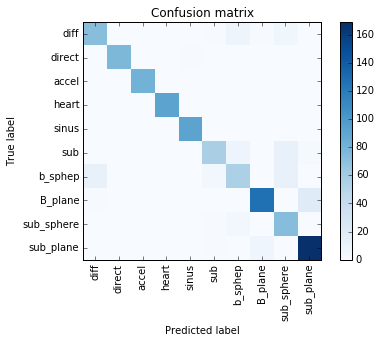

In [99]:
graph_uniform.load_weights("/home/jarbona/cluster_theano_myriad0/weight-folder/4layer-LSTM-uniform-add-error-and-400-3D-suite3-new-noise_7_138")
global_result(graph_uniform,N=1000,ndim=3,sub=False,size=100,uniform=True)

nan 27.6


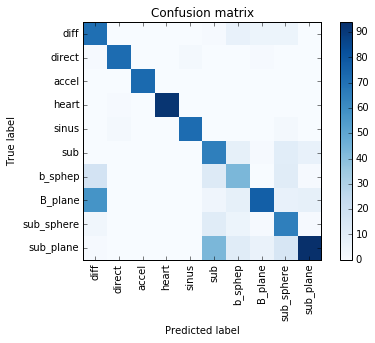

In [9]:
graph_uniform2D.load_weights("/home/jarbona/cluster_theano/weight-folder/4layer-LSTM-uniform-add-error-and-400-2D-suite_7_138")
global_result(graph_uniform2D,N=1000,ndim=2,sub=False,size=100,uniform=True)


20.5252525253 19.4


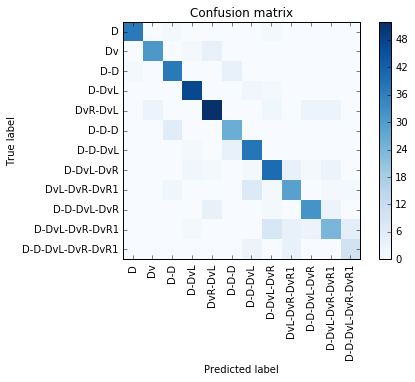

In [62]:
graph.load_weights("/home/jarbona/cluster_theano/weight-folder/4layer-LSTM-remove-small-fraction-and-400_7_42")
global_result(graph,N=500,ndim=2,sub=False,size=100)

32.2409090909 45.3


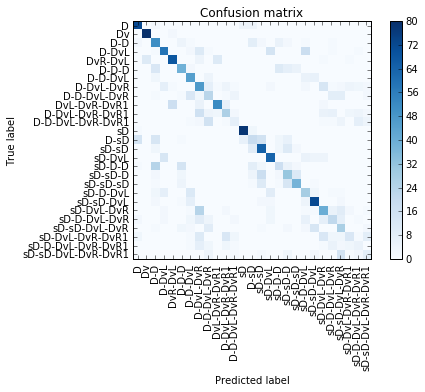

In [102]:
graph.load_weights("/home/jarbona/cluster_theano/weight-folder/4layer-LSTM-remove-small-fraction-and-400-sub-suite2_7_138")
global_result(graph,N=2000,ndim=2,sub=True,size=100)

32.2287878788 45.75


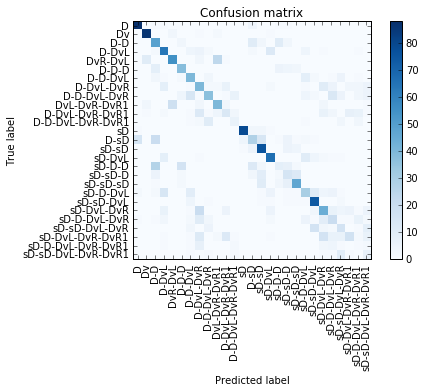

In [101]:
graph3D.load_weights("/home/jarbona/cluster_theano_myriad/weight-folder/4layer-LSTM-remove-small-fraction-and-400-sub-3D-suite3_7_138")
global_result(graph3D,N=2000,ndim=3,sub=True,size=100)